SyntaxError: invalid syntax (1557117176.py, line 1)

## IMPORTATION OF LABRARIES AND DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Iris.csv',index_col="Id")
df=data.copy()

## QUICK EXPLORATION OF DATA

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<h3>
- The ideal number of clusters is 3
- Let's retrieve that
- First of all, let's drop the Species features.
<h3/>

In [5]:
X=df.drop('Species',axis=1)

In [6]:
from sklearn.cluster import KMeans

In [8]:
cluster=KMeans(n_clusters=3,n_init=10)
cluster.fit(X)

C:\Users\INVICTUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10)

In [9]:
center=cluster.cluster_centers_
center

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

 *PRINCIPE ELBOW METHOD*:
* Plot Inertia on ylabel and number of cluster on xlabel
* Where an elbow appears is the the optimal number of clusters

### THE ELBOW METHOD


In [11]:
# List of inertia's value for each number of cluster
inertia=[]

#List containing different number of clusters
K_range=range(1,10)

for k in K_range:
    model=KMeans(n_clusters=k,n_init=10)
    model.fit(X)
    inertia.append(model.inertia_)

C:\Users\INVICTUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\INVICTUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\INVICTUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\INVICTUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

Text(0.5, 1.0, 'Elbow method')

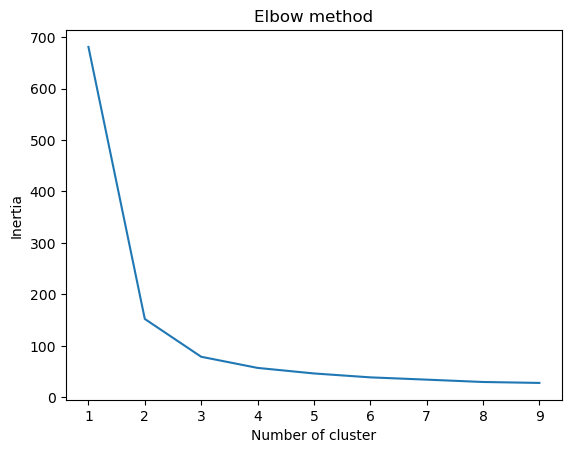

In [13]:
# Plot the inertia for each number of clusters

plt.plot(K_range,inertia)
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.title("Elbow method")

**The optimum number of clusters is : 3**

## FIT THE FINAL CLUSTER MODEL

In [28]:
final_model=KMeans(n_clusters=3,init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
final_model.fit(X)
y_pred=final_model.predict(X)

C:\Users\INVICTUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## VISUALISATION OF CLUSTERS

* We visualize the clusters - On the first two columns

Text(0, 0.5, 'SepalWidthCm')

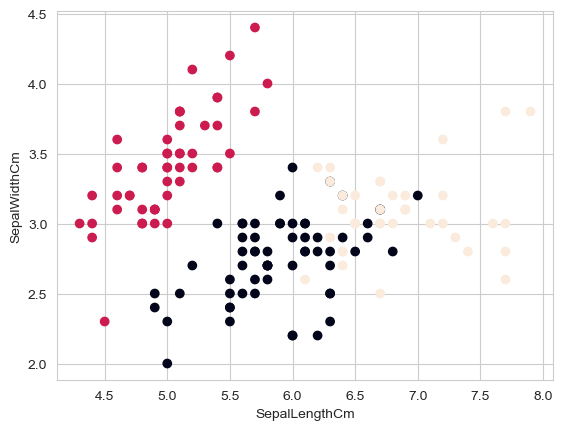

In [45]:
plt.scatter(data=X,x="SepalLengthCm",y="SepalWidthCm",c=y_pred)
plt.xlabel('SepalLengthCm')
plt.ylabel("SepalWidthCm")

* We get an overview of clustering among all variables 

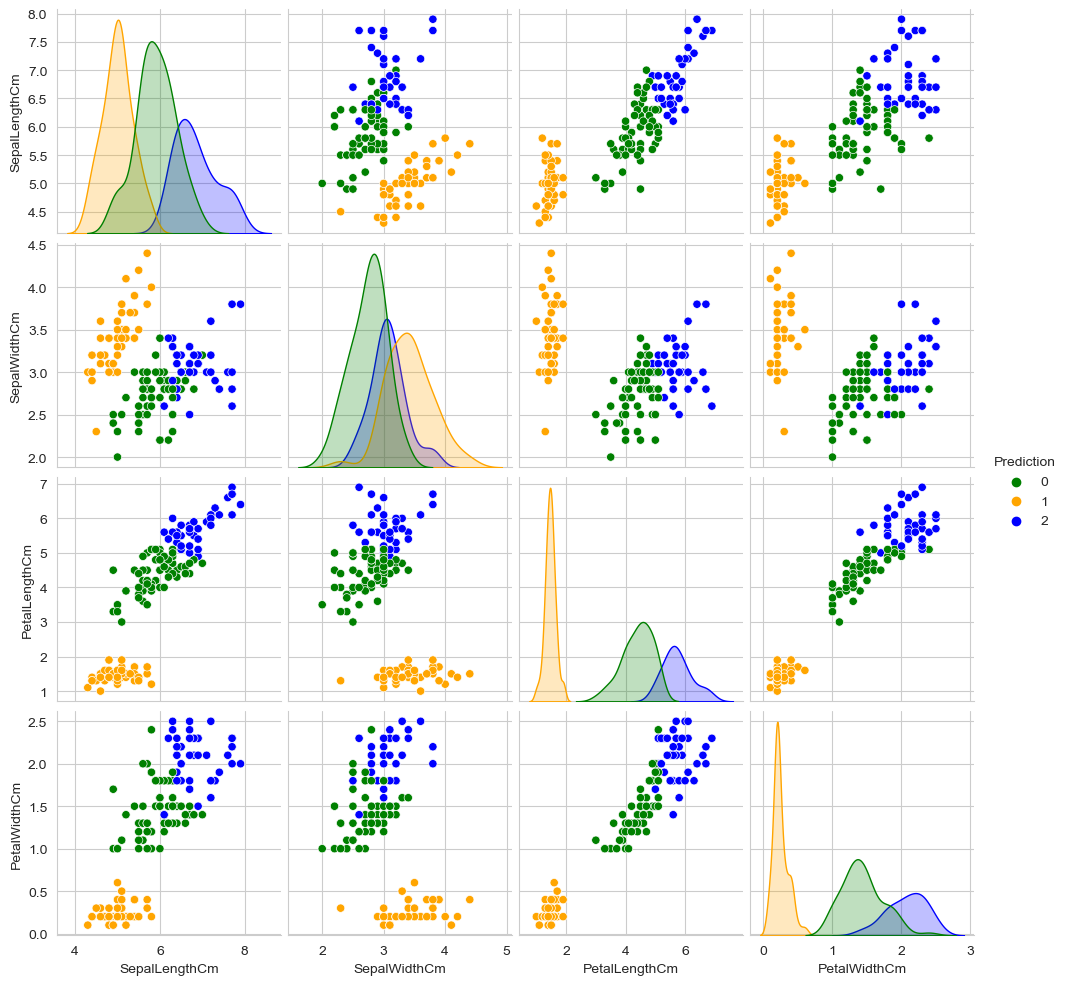

In [44]:
# We create a dataset with features and predictions
df_with_pred=X.copy()

# We add the predictions columns to the features
df_with_pred['Prediction']=y_pred

# We define a palette of color
my_palette = {0: 'green', 1: 'orange', 2: 'blue'}

# We set the "whitegrid" style to get a grid
sns.set_style("whitegrid")

# We use the pairplot function fron seaborn labrary to plot all features two by two
sns.pairplot(df_with_pred,hue='Prediction',palette=my_palette)